<a href="https://colab.research.google.com/github/dannynurdin/Product-Detection/blob/master/twitter-sentiment-analysis-using-nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install kaggle

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d kazanova/sentiment140

In [5]:
# from zipfile import ZipFile
# file_name = "sentiment140.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print("Success")


In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)

# Datasets size (max 1.6M)
df = df[:50000]

df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'tweets']
df.head()

,sentiment,id,date,query,user_id,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df = df.drop(['sentiment', 'id', 'date', 'query', 'user_id'], axis=1)
df.head()

,tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [10]:
#clean the text

#function to clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove mention
  text = re.sub(r'#', '', text) #remove hashtag
  text = re.sub(r'RT[\s:]+', '', text) #remove RT
  text = re.sub(r'https?:\\//\/s+', '', text) #remode hyperlink
  text = re.sub(r'http\S+', '', text) #work
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  return text

df['tweets'] = df['tweets'].apply(cleanTxt)

In [11]:
#create function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns 
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

#Show new dataframe
df

,tweets,Subjectivity,Polarity
0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667
1,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,my whole body feels itchy and like its on fire,0.400000,0.200000
4,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...
49995,so i have the same insomnia prob as you i sle...,0.375000,0.333333
49996,20 mintues late for my meeting starting @ 8 h...,0.475000,-0.025000
49997,_derby super excited! Are you tweeting the eve...,0.805556,0.267361
49998,I WANT ANOTHER DAY OFF!!!! To much Sht to do ...,0.200000,0.488281


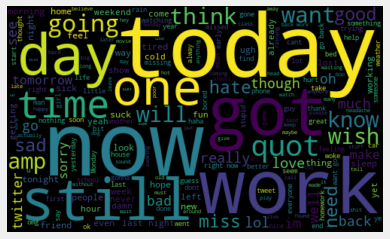

In [12]:
#Create the Word Cloud
allWord = ''.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWord)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
#Create a function to compute the negatie, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,tweets,Subjectivity,Polarity,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667,Positive
1,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,I dived many times for the ball. Managed to s...,0.500000,0.500000,Positive
3,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...
49995,so i have the same insomnia prob as you i sle...,0.375000,0.333333,Positive
49996,20 mintues late for my meeting starting @ 8 h...,0.475000,-0.025000,Negative
49997,_derby super excited! Are you tweeting the eve...,0.805556,0.267361,Positive
49998,I WANT ANOTHER DAY OFF!!!! To much Sht to do ...,0.200000,0.488281,Positive


In [14]:
df = df.drop(['Subjectivity', 'Polarity'], axis=1)

In [15]:
dfs = df.groupby('Analysis')['tweets'].nunique()

print(dfs)

Analysis
Negative    15599
Neutral     18047
Positive    15645
Name: tweets, dtype: int64


In [16]:
df

,tweets,Analysis
0,"- Awww, that's a bummer. You shoulda got Da...",Positive
1,is upset that he can't update his Facebook by ...,Neutral
2,I dived many times for the ball. Managed to s...,Positive
3,my whole body feels itchy and like its on fire,Positive
4,"no, it's not behaving at all. i'm mad. why am...",Negative
...,...,...
49995,so i have the same insomnia prob as you i sle...,Positive
49996,20 mintues late for my meeting starting @ 8 h...,Negative
49997,_derby super excited! Are you tweeting the eve...,Positive
49998,I WANT ANOTHER DAY OFF!!!! To much Sht to do ...,Positive


In [17]:
category = pd.get_dummies(df.Analysis)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Analysis')
df_baru

,tweets,Negative,Neutral,Positive
0,"- Awww, that's a bummer. You shoulda got Da...",0,0,1
1,is upset that he can't update his Facebook by ...,0,1,0
2,I dived many times for the ball. Managed to s...,0,0,1
3,my whole body feels itchy and like its on fire,0,0,1
4,"no, it's not behaving at all. i'm mad. why am...",1,0,0
...,...,...,...,...
49995,so i have the same insomnia prob as you i sle...,0,0,1
49996,20 mintues late for my meeting starting @ 8 h...,1,0,0
49997,_derby super excited! Are you tweeting the eve...,0,0,1
49998,I WANT ANOTHER DAY OFF!!!! To much Sht to do ...,0,0,1


In [18]:
tweets = df_baru['tweets'].values
label = df_baru[['Negative', 'Neutral', 'Positive']].values

In [19]:
from sklearn.model_selection import train_test_split
tweets_latih, tweets_test, label_latih, label_test = train_test_split(tweets, label, test_size=0.2)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweets_latih) 
tokenizer.fit_on_texts(tweets_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tweets_latih)
sekuens_test = tokenizer.texts_to_sequences(tweets_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [21]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [23]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks = [callbacks])

Epoch 1/30
1250/1250 - 22s - loss: 0.5196 - accuracy: 0.7857 - val_loss: 0.2894 - val_accuracy: 0.9085
Epoch 2/30

Akurasi telah mencapai >90%!
1250/1250 - 22s - loss: 0.2453 - accuracy: 0.9256 - val_loss: 0.2557 - val_accuracy: 0.9233


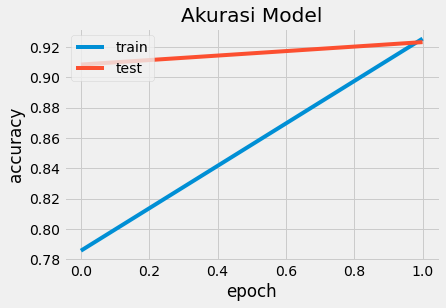

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()